In [1]:
import numpy as np
from skimage import io, data, util
import matplotlib.pyplot as plt  


In [2]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

### Amostragem

In [6]:
x = np.arange(0, 2*np.pi, 0.001)
y = np.sin(x) + np.sin(2*x) + np.sin(3*x) + np.sin(4*x)

x1 = np.linspace(0, 6283, 50).astype(np.int64)
y1 = y[x1]

x2 = np.linspace(0, 6283, 30).astype(np.int64)
y2 = y[x2]

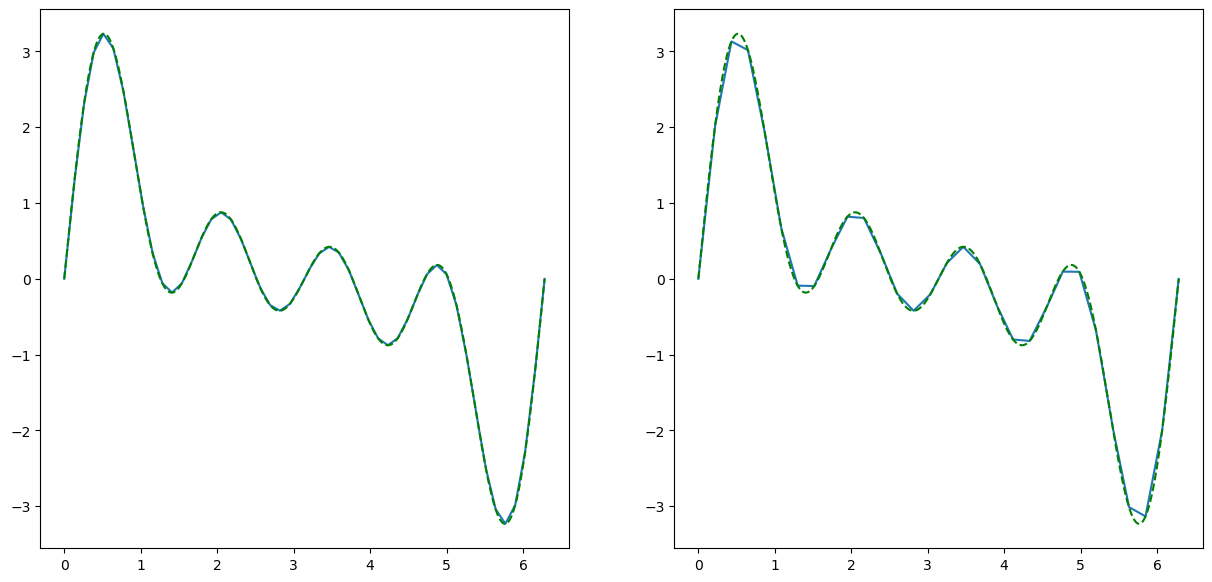

In [7]:
x_new = np.arange(0, 2*np.pi, 0.001)
ny = np.interp(x_new, x[x1], y1)
ny2 = np.interp(x_new, x[x2], y2)


f, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(x_new, ny, x, y, 'g--')
ax[1].plot(x_new, ny2, x, y, 'g--')

In [8]:
def amostragem(img, deltaX, deltaY):
    lin, col = img.shape[:2]
    nlin = lin / deltaX
    ncol = col / deltaY
    nimg = np.zeros((int(nlin), int(ncol)), dtype=np.uint8)
    for i,x in enumerate( np.arange(0,lin, deltaX) ):
        for j,y in enumerate( np.arange(0,col, deltaY )):
            nimg[i,j] = img[int(x), int(y)]


    return nimg


(512, 512)
(64, 64)


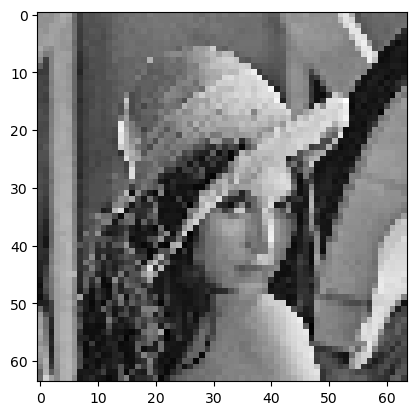

In [10]:
img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lenna_gray512.png',as_gray=True)
nimg = amostragem(img, 8, 8)
print(img.shape)
print(nimg.shape)
plt.imshow(nimg, cmap='gray')

# Resolução

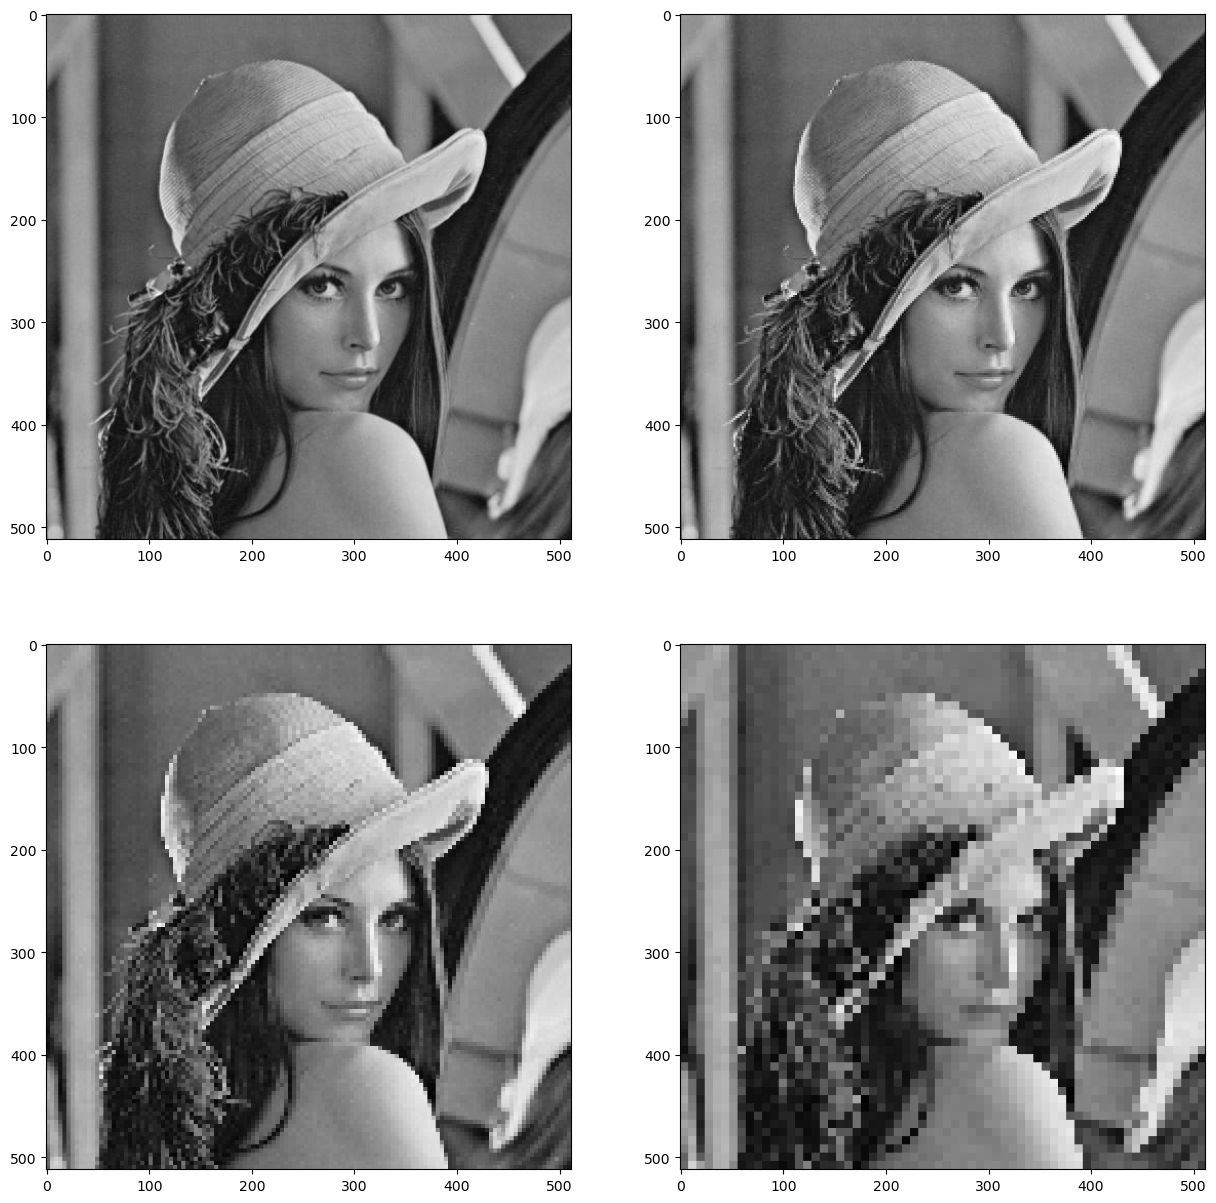

In [8]:
def modifica_escala(img, fator=0.5):
    lin, col = img.shape[:2]
 
    I = np.arange(0, lin, 1/fator).astype(int)
    J = np.arange(0, col, 1/fator).astype(int)
    
    i, j = np.meshgrid(I, J, indexing='ij')
    nimg = img[i,j]
    #nimg = img[i,j,:]
    return nimg

img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lenna_gray512.png',as_gray=True)
img2 = modifica_escala(img, 1/2)
nimg2 = modifica_escala(img2, 2)
img3 = modifica_escala(img, 1/4)
nimg3 = modifica_escala(img3, 4)
img4 = modifica_escala(img, 1/8)
nimg4 = modifica_escala(img4, 8)

f, ax = plt.subplots(2,2, figsize=(15, 15))
ax[0,0].imshow(img, cmap='gray')
ax[0,1].imshow(nimg2, cmap='gray')
ax[1,0].imshow(nimg3, cmap='gray')
ax[1,1].imshow(nimg4, cmap='gray')

# Binary quantization

[[128 128 120 104 104  96  88  80  72  72]
 [136 136 120 104 104  96  88  80  72  72]]


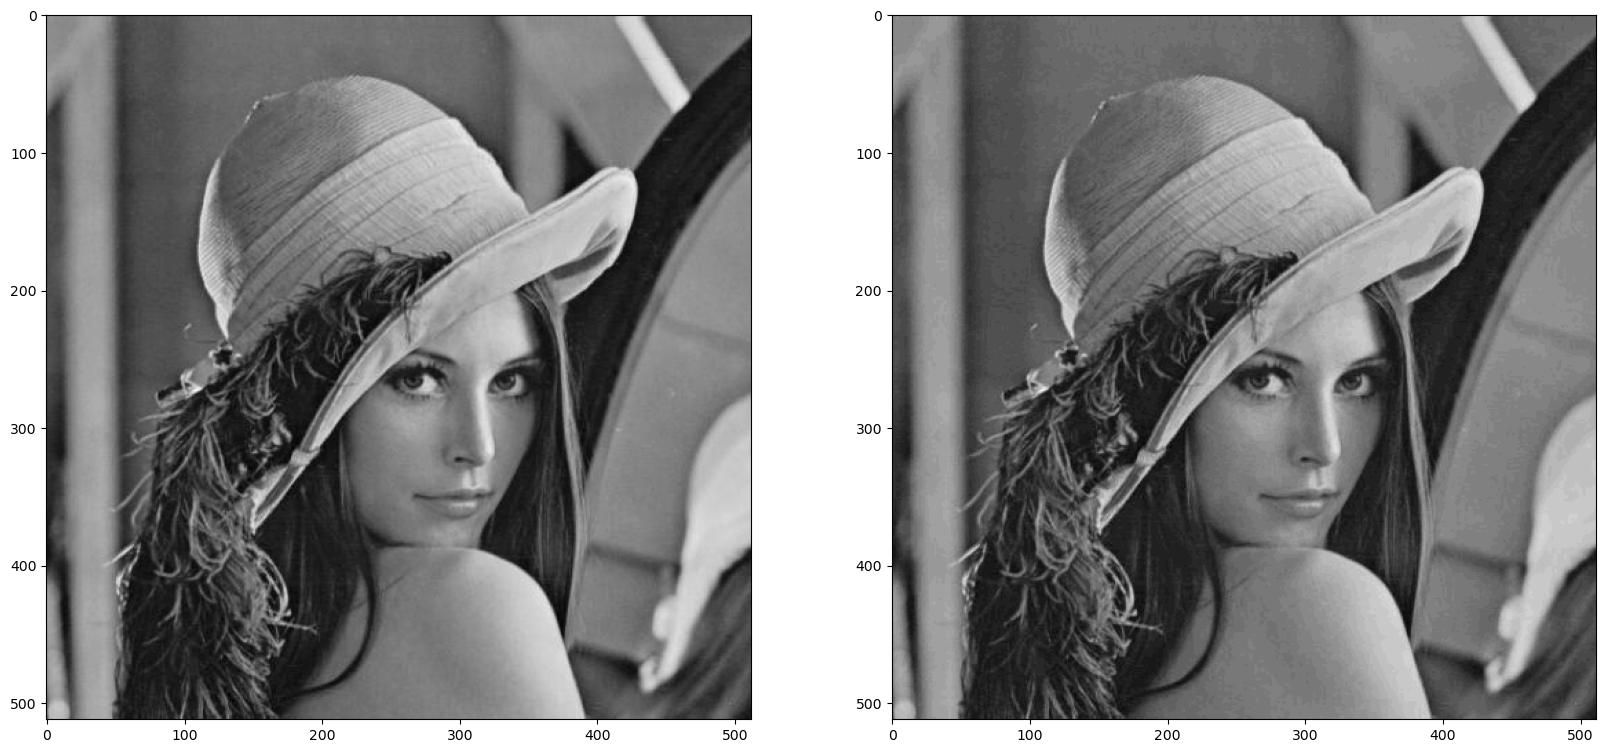

In [17]:
def quantiza(img, nbits):
    bits_shift = 8 - nbits
    nimg = img.copy()
    nimg = nimg >> bits_shift
    nimg = nimg << bits_shift
    return nimg


img = img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lenna_gray512.png',as_gray=True)
nimg = quantiza(img, 5)
f, ax = plt.subplots(1,2, figsize=(20,20))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(nimg, cmap='gray', vmin=0, vmax=255)


print(nimg[2:4, 45:55])

# Histograma

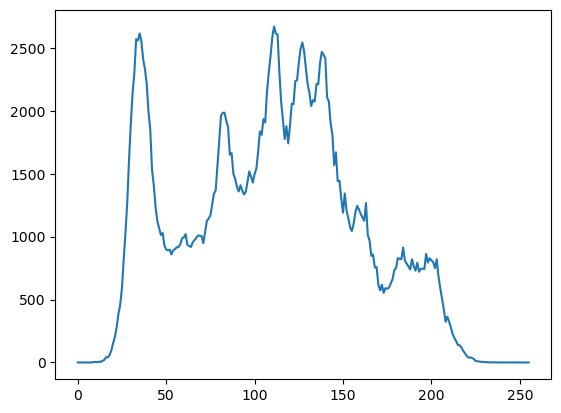

In [19]:
def histograma(img):
    lin, col = img.shape
    nimg = img.copy()
    if np.max(nimg) <= 1:
        nimg = np.uint8(nimg*255)
    h = np.zeros((256))
    for i in range(lin):
        for j in range(col):
            h[nimg[i,j]] += 1
    return h

h = histograma(img)
plt.plot(h)


### Histogramas em Skimage

In [21]:
from skimage import transform


float64
uint8
min = 0.06940246756854124 max = 0.900572247070507


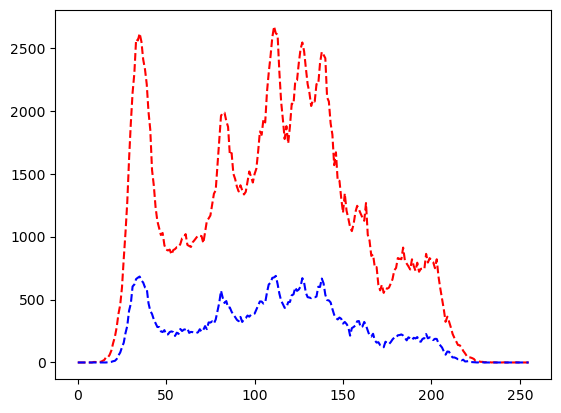

In [22]:
simg = transform.rescale(img, (0.5, 0.5))
print(simg.dtype)
print(img.dtype)
print(f'min = {np.min(simg)} max = {np.max(simg)}')
hs = histograma(simg)
plt.plot(h, 'r--', hs, 'b--')


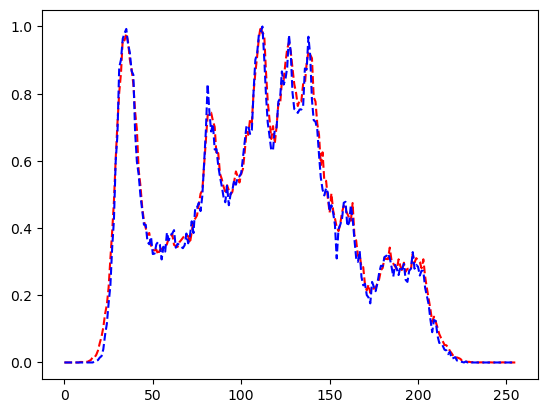

In [24]:
plt.plot(h/np.max(h), 'r--', hs/np.max(hs), 'b--')
#plt.plot(h/np.sum(h), 'r--', hs/np.sum(hs), 'b--')

### Histograma em Skimage

<p>
<b>skimage.exposure.histogram</b>(image, nbins=256, source_range='image', normalize=False, *, channel_axis=None): Return histogram of image.

Unlike numpy.histogram, this function returns the centers of bins and does not rebin integer arrays. For integer arrays, each integer value has its own bin, which improves speed and intensity-resolution.


Parameters:
<ul>
    <li> image: array. Input image.</li>
    <li>nbins: int, optional. Number of bins used to calculate histogram. This value is ignored for integer arrays.</li>
    <li>normalize: bool, optional. If True, normalize the histogram by the sum of its values.</li>
    <li>channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels.</li>
</ul>

Returns:
<ul>
    <li>hist: array. The values of the histogram. When channel_axis is not None, hist will be a 2D array where the first axis corresponds to channels.</li>
    <li>bin_centers: array. The values at the center of the bins.</li>
</ul>
</p>

In [25]:
from skimage import exposure


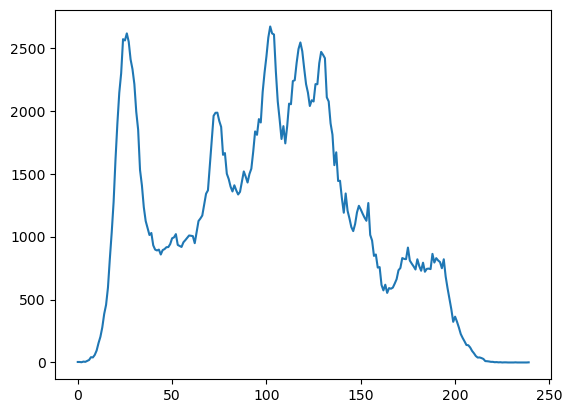

In [26]:
hist_phase, bins_phase = exposure.histogram(img)
plt.plot(hist_phase)

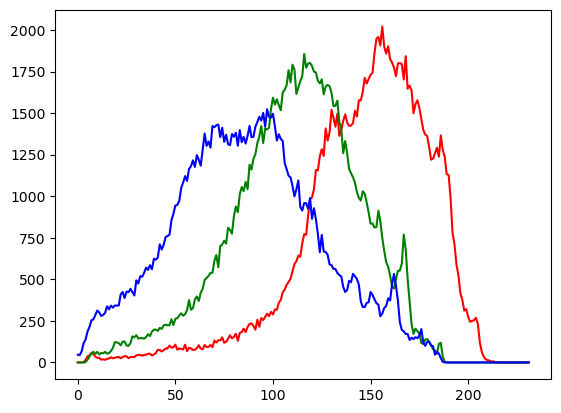

In [27]:
from skimage import util
img2 = data.chelsea()
#h3 = exposure.histogram(img_as_float(img2), channel_axis=2)
hist_phase2, bins_phase2 = exposure.histogram(img2, nbins = 256, channel_axis=2)
plt.plot(hist_phase2[0], 'r', hist_phase2[1], 'g', hist_phase2[2], 'b')

### Histograma em Scipy

<p>
<b>scipy.ndimage.histogram</b>(input, min, max, bins, labels=None, index=None):  Calculate the histogram of the values of an array, optionally at labels.

Histogram calculates the frequency of values in an array within bins determined by min, max, and bins. The labels and index keywords can limit the scope of the histogram to specified sub-regions within the array.


Parameters:
<ul>
    <li>input: array_like. Data for which to calculate histogram.</li>
    <li>min, max: int. Minimum and maximum values of range of histogram bins.</li>
    <li>bins: int. Number of bins.</li>
    <li>labels: array_like, optional. Labels for objects in input. If not None, must be same shape as input.</li>
    <li>index: int or sequence of ints, optional. Label or labels for which to calculate histogram. If None, all values where label is greater than zero are used</li>
</ul>

Returns:
<ul>
    <li>hist: ndarray. Histogram counts.</li>
</ul>
</p>

In [28]:
from scipy import ndimage

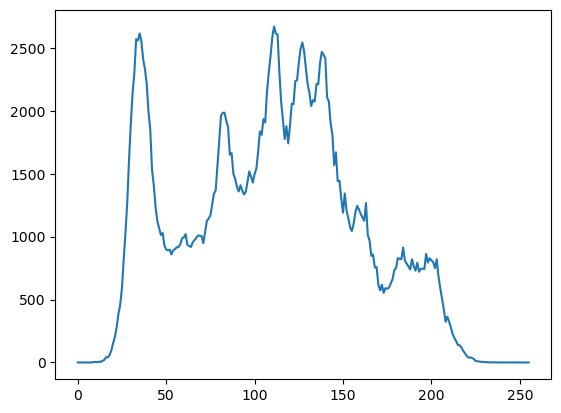

In [29]:
hist = ndimage.histogram(img, min=0, max=255, bins=256)
plt.plot(hist)

### Histograma em Numpy

<p>
<b>numpy.histogram</b>(a, bins=10, range=None, density=None, weights=None): Compute the histogram of a dataset.


Parameters:
<ul>
    <li>a: array_like. Input data. The histogram is computed over the flattened array.</li>
    <li>bins: int or sequence of scalars or str, optional. If bins is an int, it defines the number of equal-width bins in the given range (10, by default). If bins is a sequence, it defines a monotonically increasing array of bin edges, including the rightmost edge, allowing for non-uniform bin widths.</li>
    <li>range: (float, float), optional. The lower and upper range of the bins. If not provided, range is simply (a.min(), a.max()). Values outside the range are ignored. The first element of the range must be less than or equal to the second. range affects the automatic bin computation as well. While bin width is computed to be optimal based on the actual data within range, the bin count will fill the entire range including portions containing no data.</li>
    <li>weights: array_like, optional. An array of weights, of the same shape as a. Each value in a only contributes its associated weight towards the bin count (instead of 1). If density is True, the weights are normalized, so that the integral of the density over the range remains 1.</li>
    <li>density: bool, optional. If False, the result will contain the number of samples in each bin. If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not a probability mass function.</li>
</ul>

Returns:
<ul>
    <li>hist: array. The values of the histogram. See density and weights for a description of the possible semantics.</li>
    <li>bin_edges: array of dtype float. Return the bin edges (length(hist)+1).</li>
</ul>
</p>

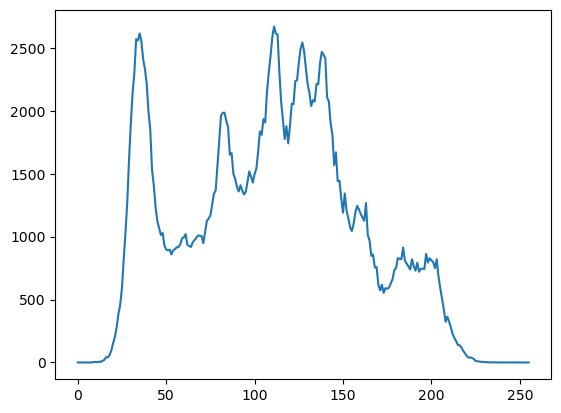

In [30]:
hist, _ = np.histogram(img.flatten(), bins=256, range=(0,255))
plt.plot(hist)

In [21]:
x = np.linspace(0, 256, 5)
print(x)

[  0.  64. 128. 192. 256.]


In [27]:
def colorHistogram(img, bins = 4):
    red = np.linspace(0, 256, bins+1)
    green = np.linspace(0, 256, bins+1)
    blue = np.linspace(0, 256, bins+1)
    h = np.zeros((bins*bins*bins))
    pos = 0

    for r in range(bins):
        for g in range(bins):
            for b in range(bins):
                red_pixels = np.logical_and( img[:,:,0] >= red[r], img[:,:,0] < red[r+1] )
                green_pixels = np.logical_and( img[:,:,1] >= green[g], img[:,:,1] < green[g+1] )
                blue_pixels = np.logical_and( img[:,:,2] >= blue[b], img[:,:,2] < blue[b+1] )
                pixels = np.logical_and( np.logical_and(red_pixels, green_pixels), blue_pixels)
                h[pos] = np.sum(pixels)
                pos += 1
    return h


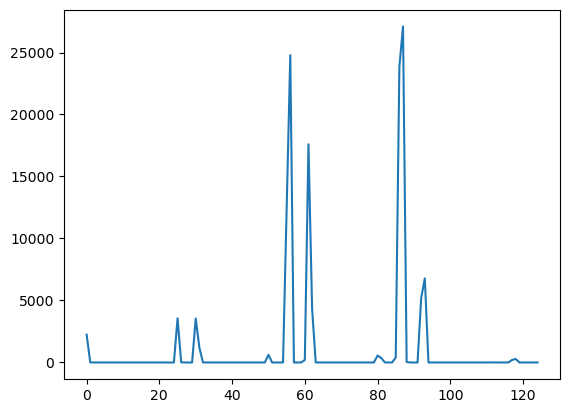

In [28]:
cat = data.chelsea()
h = colorHistogram(cat, bins=5)
plt.plot(h)

# Transformacoes Radiometricas

#### Correção Gamma

In [29]:
def gamma_correction(img, gamma=0.5, c = 1):
    f_img = util.img_as_float(img)
    nimg = c * f_img ** gamma
    return nimg


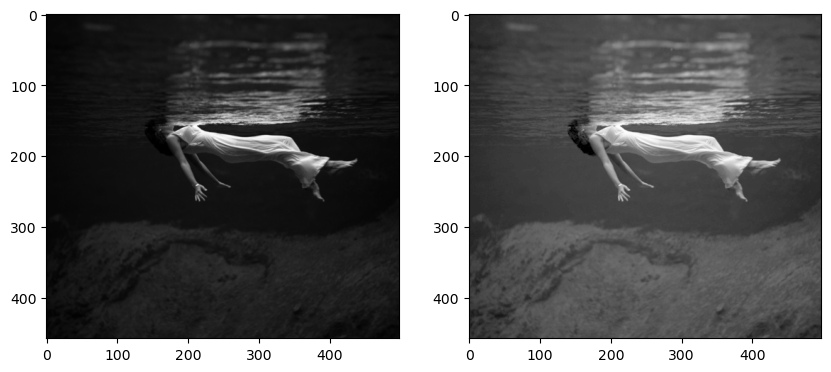

In [32]:
img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\gammaImage.png', as_gray=True)
nimg = gamma_correction(img, gamma=0.5)
f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(nimg, cmap='gray')


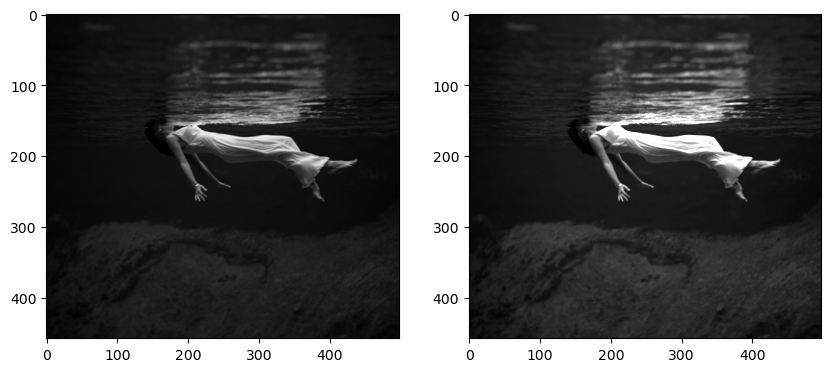

In [33]:
img_f = util.img_as_float(img)
nimg_f = img_f*1.5
f,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_f, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(nimg_f, vmin=0, vmax=1, cmap='gray')

In [36]:
def mapping(img):
    nimg = util.img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

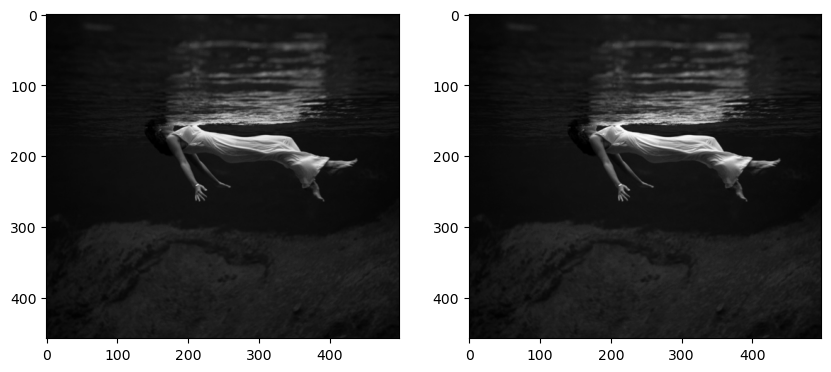

In [38]:
img_f = util.img_as_float(img)
nimg_f = img_f*0.5
f,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_f, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(mapping(nimg_f), vmin=0, vmax=1, cmap='gray')

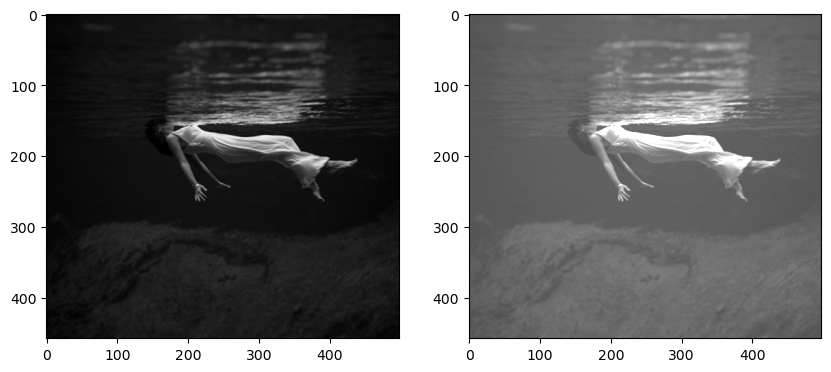

In [39]:
img_f = util.img_as_float(img)
nimg_f = img_f + 80/255
f,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_f, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(nimg_f, vmin=0, vmax=1, cmap='gray')

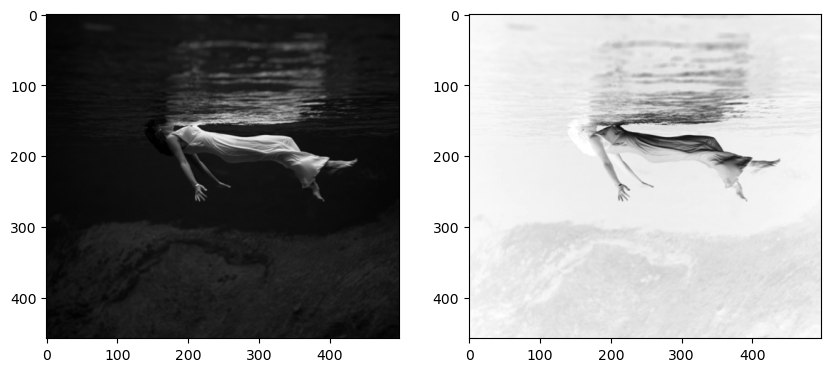

In [40]:
img_f = util.img_as_float(img)
nimg_f = 1 - img_f
f,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_f, vmin=0, vmax=1, cmap='gray')
ax[1].imshow(nimg_f, vmin=0, vmax=1, cmap='gray')

# Binariza

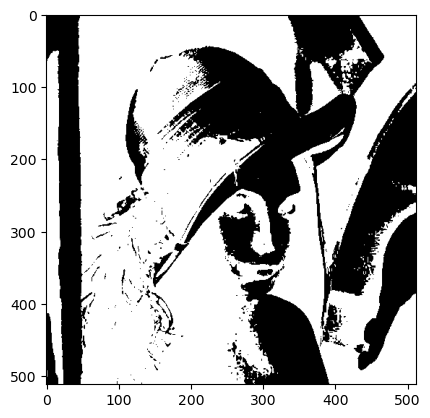

In [43]:
def binariza(img, thresh):
    nimg = np.zeros_like(img, dtype=np.int8)
    ind = img >= thresh
    nimg[ind] = 255
    return nimg

nimg = binariza(img, 127)
plt.imshow(nimg, cmap='gray')

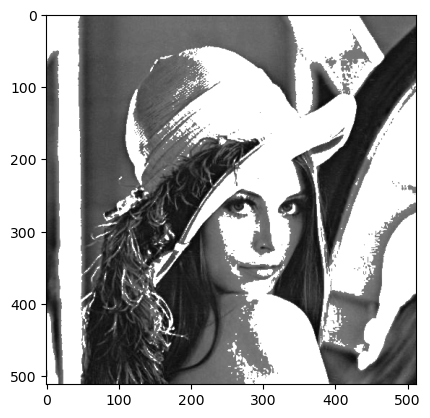

In [44]:
def binariza_fundo(img, thresh):
    nimg = img.copy()
    ind = img >= thresh
    nimg[ind] = 255
    return nimg

nimg = binariza_fundo(img, 127)
plt.imshow(nimg, cmap='gray')

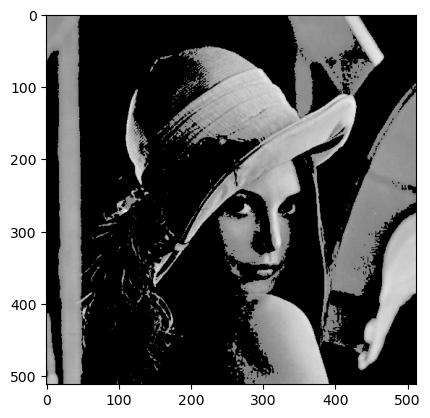

In [45]:
def binariza_fundo(img, thresh):
    nimg = img.copy()
    ind = img < thresh
    nimg[ind] = 0
    return nimg

nimg = binariza_fundo(img, 127)
plt.imshow(nimg, cmap='gray')

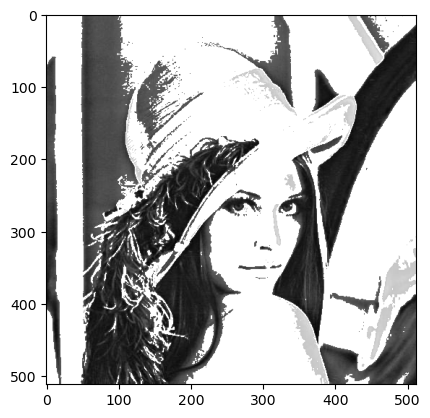

In [47]:
def corte_plano(img, a, b, k):
    nimg = img.copy()
    ind = np.logical_and(img > a, img < b)
    nimg[ind] = k
    return nimg

nimg = corte_plano(img, 100, 200, 255)
plt.imshow(nimg, cmap='gray')